# Importing, Reading and Manipulating Data with ACTUAL LITERAL PANDAS

![I have no idea what I'm doing panda](https://cdn-images-1.medium.com/max/1600/1*oBx032ncOwLmCFX3Epo3Zg.jpeg)

Just kidding - but Pandas is a great library to work with relational data. 

[Check out the documentation!](https://pandas.pydata.org/pandas-docs/stable/) (always a great idea)

Pandas is a library we're going to be using pretty much every day in this course, so we're going to do a ton of practice so you can be on your way to becoming a _PANDAS MASTER_.

![Kung fu panda excited](https://data.whicdn.com/images/201331793/original.gif)

Today, we're going to look at some data from the Austin Animal Shelter. Data source: [intakes data](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Intakes/wter-evkm) and [outcomes data](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Outcomes/9t4d-g238).

First, let's look at intake data, which is data describing the animals as they enter the shelter.

In [1]:
# Imports! Can't use pandas unless we bring it into our notebook
import pandas as pd

In [2]:
# So... how do we access our data?
# I've provided the path - replace None with appropriate code
PATH = "data/Austin_Animal_Center_Intakes.csv"

intakes = pd.read_csv(PATH)

In [3]:
# Code here to check out the first few rows
intakes.head()

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,A786884,*Brock,01/03/2019 04:19:00 PM,01/03/2019 04:19:00 PM,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
1,A706918,Belle,07/05/2015 12:59:00 PM,07/05/2015 12:59:00 PM,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
2,A724273,Runster,04/14/2016 06:43:00 PM,04/14/2016 06:43:00 PM,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White
3,A665644,NaN,10/21/2013 07:59:00 AM,10/21/2013 07:59:00 AM,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico
4,A682524,Rio,06/29/2014 10:38:00 AM,06/29/2014 10:38:00 AM,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray


In [4]:
intakes["Sex upon Intake"].value_counts()

Intact Male      37163
Intact Female    35199
Neutered Male    17907
Spayed Female    15368
Unknown           9451
Name: Sex upon Intake, dtype: int64

In [5]:
# Code here to check the shape of the dataframe
intakes.shape

(115089, 12)

In [6]:
# Code here to check the size of the dataframe
intakes.size

1381068

In [7]:
# Code here to check information on the dataframe
intakes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115089 entries, 0 to 115088
Data columns (total 12 columns):
Animal ID           115089 non-null object
Name                78859 non-null object
DateTime            115089 non-null object
MonthYear           115089 non-null object
Found Location      115089 non-null object
Intake Type         115089 non-null object
Intake Condition    115089 non-null object
Animal Type         115089 non-null object
Sex upon Intake     115088 non-null object
Age upon Intake     115089 non-null object
Breed               115089 non-null object
Color               115089 non-null object
dtypes: object(12)
memory usage: 10.5+ MB


Questions to ask yourself:

- How can you describe the shape of the data?
- Are there any empty cells? How can I tell?
- What are the datatypes of the data?

**Note:** You see that some of the ways we dealt with our dataframe required `()` and some did not - why is that?

## Dealing with Null Data

It is a fact of the data science life - you will always be surrounded by 'dirty' data. What does it mean for data to be 'dirty'? What are some of the various ways that data can be 'dirty'?

- missing values / blanks / NaNs / nulls
- nonsense data - stuff that doesn't make sense in context (negatives, '9999', any other 'default' value that doesn't convey meaning)
- repeated / duplicate values

In [8]:
# Check for null values recognized by pandas as blank
# Run this cell without changes - is this helpful?
intakes.isna()

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
115084,False,True,False,False,False,False,False,False,False,False,False,False
115085,False,True,False,False,False,False,False,False,False,False,False,False
115086,False,True,False,False,False,False,False,False,False,False,False,False
115087,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
# Code here for a more helpful null check
intakes.isna().mean()

Animal ID           0.000000
Name                0.314800
DateTime            0.000000
MonthYear           0.000000
Found Location      0.000000
Intake Type         0.000000
Intake Condition    0.000000
Animal Type         0.000000
Sex upon Intake     0.000009
Age upon Intake     0.000000
Breed               0.000000
Color               0.000000
dtype: float64

There is no one way to deal with null values. What are some of the strategies we can use to deal with them?

- change them to a measure of central tendency - mode, median, mean
- change them to a nonsense number, so you can still see what was null
- drop them

How, in Pandas, can we fill null values recognized by Pandas as null? Let's practice by filling nulls for the Name column with some placeholder value, like 'No name'.

Helpful link: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html

In [10]:
# Code here to fill nulls in the Name column
intakes['Name'].fillna(value="No name", inplace=True)

Now let's check for nulls again...

In [11]:
# Sanity check
intakes.isna().sum()

Animal ID           0
Name                0
DateTime            0
MonthYear           0
Found Location      0
Intake Type         0
Intake Condition    0
Animal Type         0
Sex upon Intake     1
Age upon Intake     0
Breed               0
Color               0
dtype: int64

Let's try a different strategy for the one lonely null in the 'Sex upon Intake' column - let's just drop that row, since it's only one observation.

Helpful link: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html

In [12]:
# Code here to drop the whole row where Sex upon Intake is null
intakes["Sex upon Intake"].fillna("Unknown", inplace=True)

In [13]:
# Copy/paste code from above to re-check for nulls
intakes.isna().sum()

Animal ID           0
Name                0
DateTime            0
MonthYear           0
Found Location      0
Intake Type         0
Intake Condition    0
Animal Type         0
Sex upon Intake     0
Age upon Intake     0
Breed               0
Color               0
dtype: int64

How do we find sneaky null values that aren't marked by Pandas as null?

In [14]:
# Run this cell without changes
intakes['Age upon Intake'].value_counts()

1 year       20496
2 years      17152
1 month      11091
3 years       6929
2 months      6142
4 years       4189
4 weeks       4126
5 years       3811
3 weeks       3404
4 months      2976
3 months      2967
5 months      2872
6 years       2562
2 weeks       2349
6 months      2235
7 years       2177
8 years       2130
7 months      1756
9 months      1737
10 years      1692
8 months      1395
9 years       1240
1 week         945
10 months      913
12 years       828
1 weeks        788
11 months      724
0 years        702
11 years       693
1 day          561
13 years       524
3 days         500
2 days         455
14 years       354
15 years       307
4 days         302
5 weeks        302
6 days         284
5 days         173
16 years       133
17 years        74
18 years        46
19 years        24
20 years        17
-1 years         4
22 years         4
25 years         1
24 years         1
-3 years         1
21 years         1
Name: Age upon Intake, dtype: int64

Analyze the values you're finding in the 'Age upon Intake' column. What doesn't quite fit here?

**Note:** using `.value_counts()` is just one way to look at the values of a column. In this case, it works because we can see which values are the most common, and it's verbose enough to show even the less common values that might be problematic.

So - how do we want to deal with the data in here that doesn't make sense?

- 

One strategy for dealing with data involves making it so that we can sort by age, and have a standard scale for age.

First, let's see what that would look like if we try it as the column is now:

In [15]:
# Run this cell without changes
intakes['Age upon Intake'].sort_values(ascending=True).unique()

array(['-1 years', '-3 years', '0 years', '1 day', '1 month', '1 week',
       '1 weeks', '1 year', '10 months', '10 years', '11 months',
       '11 years', '12 years', '13 years', '14 years', '15 years',
       '16 years', '17 years', '18 years', '19 years', '2 days',
       '2 months', '2 weeks', '2 years', '20 years', '21 years',
       '22 years', '24 years', '25 years', '3 days', '3 months',
       '3 weeks', '3 years', '4 days', '4 months', '4 weeks', '4 years',
       '5 days', '5 months', '5 weeks', '5 years', '6 days', '6 months',
       '6 years', '7 months', '7 years', '8 months', '8 years',
       '9 months', '9 years'], dtype=object)

Let's unpack what is happening in that line of code - I take the column 'Age upon Intake' by itself (as a series), then sort the values from lowest to highest (`ascending=True`), then grab only unique results so we can see how it ordered the values without looking through all 115,088.

Does that do what we want it to? Let's discuss how this worked - how did it sort?

- 

To make our problem a bit easier, without dealing with the different ways that age is broken out, let's only look at animals where the age is given in years. How can we do that?

In [16]:
# Code here to grab only the animals where age is given in years

years_df = intakes.loc[intakes["Age upon Intake"].str.contains("year") == True]

In [17]:
# Check the shape of this subset dataframe
years_df.shape

(66092, 12)

In [18]:
# Sanity check
years_df["Age upon Intake"].unique()

array(['2 years', '8 years', '4 years', '6 years', '14 years', '18 years',
       '1 year', '5 years', '3 years', '15 years', '7 years', '12 years',
       '10 years', '9 years', '0 years', '11 years', '13 years',
       '17 years', '19 years', '16 years', '20 years', '22 years',
       '21 years', '-1 years', '25 years', '24 years', '-3 years'],
      dtype=object)

Can we grab only the number of years from this? Let's make a new column where we can put this data.

In [19]:
# Code here to make a new column, 'Age in Years'
years_df["Age in Years"] = years_df["Age upon Intake"].str.split(" ").str[0]

# Did you get a 'SettingWithCopyWarning'? No worries - let's discuss

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [20]:
years_df["Age in Years"]

0         2
1         8
4         4
5         2
6         6
         ..
115081    1
115082    3
115084    2
115085    1
115087    7
Name: Age in Years, Length: 66092, dtype: object

In [21]:
# Code here to transform that column to an integer
years_df["Age in Years"] = years_df["Age in Years"].astype("int")

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [23]:
# Code here to check your work
years_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66092 entries, 0 to 115087
Data columns (total 13 columns):
Animal ID           66092 non-null object
Name                66092 non-null object
DateTime            66092 non-null object
MonthYear           66092 non-null object
Found Location      66092 non-null object
Intake Type         66092 non-null object
Intake Condition    66092 non-null object
Animal Type         66092 non-null object
Sex upon Intake     66092 non-null object
Age upon Intake     66092 non-null object
Breed               66092 non-null object
Color               66092 non-null object
Age in Years        66092 non-null int64
dtypes: int64(1), object(12)
memory usage: 7.1+ MB


In [24]:
# Code here to check some statistics on our now-numeric column
years_df["Age in Years"].describe()

count    66092.000000
mean         3.422835
std          3.169188
min         -3.000000
25%          1.000000
50%          2.000000
75%          5.000000
max         25.000000
Name: Age in Years, dtype: float64

In [25]:
# Code here to check the unique values - in order!
years_df["Age in Years"].value_counts()

 1     20496
 2     17152
 3      6929
 4      4189
 5      3811
 6      2562
 7      2177
 8      2130
 10     1692
 9      1240
 12      828
 0       702
 11      693
 13      524
 14      354
 15      307
 16      133
 17       74
 18       46
 19       24
 20       17
 22        4
-1         4
-3         1
 21        1
 24        1
 25        1
Name: Age in Years, dtype: int64

In [26]:
# Let's check the mean for our now-numeric column
years_df["Age in Years"].mean()

3.4228348362888097

In [27]:
# Now let's check the median
years_df["Age in Years"].median()

2.0

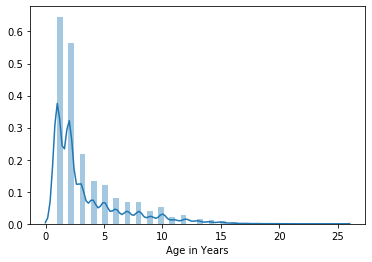

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(years_df["Age in Years"])
plt.show()

Let's discuss this column - what does it mean that the mean and median are different? How will that change if we remove some of the nonsense numbers?

- 

In [29]:
# Code here to deal with those nonsense numbers
nonsense_years = [-3, -1, 0]
year_median = years_df["Age in Years"].median()

years_df["Age in Years"].replace(to_replace=nonsense_years, 
                                 value=year_median, 
                                 inplace=True)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [30]:
# Sanity check
years_df["Age in Years"].unique()

array([ 2,  8,  4,  6, 14, 18,  1,  5,  3, 15,  7, 12, 10,  9, 11, 13, 17,
       19, 16, 20, 22, 21, 25, 24])

In [31]:
# Code here to re-check your mean/median values
print(years_df["Age in Years"].mean())
print(years_df["Age in Years"].median())

3.444335169158143
2.0


## Dealing with Duplicates

How can we check for duplicates?

In [32]:
intakes.head()

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,A786884,*Brock,01/03/2019 04:19:00 PM,01/03/2019 04:19:00 PM,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
1,A706918,Belle,07/05/2015 12:59:00 PM,07/05/2015 12:59:00 PM,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
2,A724273,Runster,04/14/2016 06:43:00 PM,04/14/2016 06:43:00 PM,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White
3,A665644,No name,10/21/2013 07:59:00 AM,10/21/2013 07:59:00 AM,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico
4,A682524,Rio,06/29/2014 10:38:00 AM,06/29/2014 10:38:00 AM,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray


In [33]:
# Code here to check for duplicates
intakes.duplicated().sum()

15

In [34]:
# Code here to check what the duplicates look like
intakes.loc[intakes.duplicated(keep=False) == True]

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
4985,A696688,Mari,02/10/2015 11:00:00 AM,02/10/2015 11:00:00 AM,Austin (TX),Owner Surrender,Normal,Cat,Spayed Female,3 years,Domestic Shorthair Mix,Calico/White
4986,A696688,Mari,02/10/2015 11:00:00 AM,02/10/2015 11:00:00 AM,Austin (TX),Owner Surrender,Normal,Cat,Spayed Female,3 years,Domestic Shorthair Mix,Calico/White
6505,A727043,*Larry,05/17/2016 03:46:00 PM,05/17/2016 03:46:00 PM,9515 N Lamar Blvd in Austin (TX),Stray,Normal,Cat,Intact Male,1 year,Domestic Shorthair Mix,Blue/White
6506,A727043,*Larry,05/17/2016 03:46:00 PM,05/17/2016 03:46:00 PM,9515 N Lamar Blvd in Austin (TX),Stray,Normal,Cat,Intact Male,1 year,Domestic Shorthair Mix,Blue/White
8488,A761936,No name,11/12/2017 11:16:00 AM,11/12/2017 11:16:00 AM,8400 Old Bee Caves in Austin (TX),Stray,Normal,Dog,Intact Male,9 months,Scottish Terrier Mix,Brown Brindle
8489,A761936,No name,11/12/2017 11:16:00 AM,11/12/2017 11:16:00 AM,8400 Old Bee Caves in Austin (TX),Stray,Normal,Dog,Intact Male,9 months,Scottish Terrier Mix,Brown Brindle
11276,A561806,Dasia,06/05/2017 11:36:00 AM,06/05/2017 11:36:00 AM,2002 Nightview in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,Pit Bull Mix,Brown Brindle/White
11277,A561806,Dasia,06/05/2017 11:36:00 AM,06/05/2017 11:36:00 AM,2002 Nightview in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,Pit Bull Mix,Brown Brindle/White
19295,A773428,*Atreyu,05/31/2018 06:38:00 PM,05/31/2018 06:38:00 PM,7Th And Gonzalez in Austin (TX),Stray,Normal,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Orange Tabby
19296,A773428,*Atreyu,05/31/2018 06:38:00 PM,05/31/2018 06:38:00 PM,7Th And Gonzalez in Austin (TX),Stray,Normal,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Orange Tabby


In [35]:
# Code here to handle duplicates
intakes.drop_duplicates(inplace=True)

In [36]:
# Sanity check
intakes.duplicated().sum()

0

## Merging Dataframes

We were given two dataframes here - both an Intakes and an Outcomes CSV. Let's merge them!

![Merge diagram from Data Science Made Simple](http://www.datasciencemadesimple.com/wp-content/uploads/2017/09/join-or-merge-in-python-pandas-1.png)

[Image from Data Science Made Simple's post on Joining/Merging Pandas Data Frames](http://www.datasciencemadesimple.com/join-merge-data-frames-pandas-python/)

In [47]:
intakes.head()

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,A786884,*Brock,01/03/2019 04:19:00 PM,01/03/2019 04:19:00 PM,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
1,A706918,Belle,07/05/2015 12:59:00 PM,07/05/2015 12:59:00 PM,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
2,A724273,Runster,04/14/2016 06:43:00 PM,04/14/2016 06:43:00 PM,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White
3,A665644,No name,10/21/2013 07:59:00 AM,10/21/2013 07:59:00 AM,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico
4,A682524,Rio,06/29/2014 10:38:00 AM,06/29/2014 10:38:00 AM,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray


In [42]:
# Read in our outcomes csv
outcomes = pd.read_csv("data/Austin_Animal_Center_Outcomes.csv")

In [46]:
# Check out our outcomes data
outcomes.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A789027,Lennie,02/17/2019 11:44:00 AM,02/17/2019 11:44:00 AM,02/13/2017,Adoption,NaN,Dog,Neutered Male,2 years,Chihuahua Shorthair Mix,Cream
1,A720371,Moose,02/13/2016 05:59:00 PM,02/13/2016 05:59:00 PM,10/08/2015,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
2,A674754,NaN,03/18/2014 11:47:00 AM,03/18/2014 11:47:00 AM,03/12/2014,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby
3,A689724,*Donatello,10/18/2014 06:52:00 PM,10/18/2014 06:52:00 PM,08/01/2014,Adoption,NaN,Cat,Neutered Male,2 months,Domestic Shorthair Mix,Black
4,A680969,*Zeus,08/05/2014 04:59:00 PM,08/05/2014 04:59:00 PM,06/03/2014,Adoption,NaN,Cat,Neutered Male,2 months,Domestic Shorthair Mix,White/Orange Tabby


In [43]:
outcomes["Animal ID"].value_counts()

A721033    33
A718223    14
A718877    12
A706536    11
A616444     9
           ..
A681995     1
A715835     1
A732934     1
A755039     1
A672792     1
Name: Animal ID, Length: 103095, dtype: int64

In [44]:
len(outcomes.loc[outcomes["Animal ID"] == "A718223"])

14

In [37]:
len(intakes.loc[intakes["Animal ID"] == "A718223"])

14

What column should we use to merge these DataFrames?

-

In [45]:
outcomes.shape

(115213, 12)

In [48]:
# Code here to merge dataframes - replace None with appropriate code
combined_df = intakes.merge(outcomes,
                            how="inner",
                            on=["Animal ID", ],
                            suffixes=('_intakes', '_outcomes'),
                            validate="many_to_many")

In [49]:
# Code here to check out the details of our new dataframe
combined_df.shape

(148247, 23)

In [50]:
combined_df.columns

Index(['Animal ID', 'Name_intakes', 'DateTime_intakes', 'MonthYear_intakes',
       'Found Location', 'Intake Type', 'Intake Condition',
       'Animal Type_intakes', 'Sex upon Intake', 'Age upon Intake',
       'Breed_intakes', 'Color_intakes', 'Name_outcomes', 'DateTime_outcomes',
       'MonthYear_outcomes', 'Date of Birth', 'Outcome Type',
       'Outcome Subtype', 'Animal Type_outcomes', 'Sex upon Outcome',
       'Age upon Outcome', 'Breed_outcomes', 'Color_outcomes'],
      dtype='object')

In [51]:
len(combined_df.loc[combined_df["Animal ID"] == "A718223"])

196

In [52]:
14 * 14

196

Is the shape of the merged DataFrame what we expected? Let's discuss.

- 

## Level Up!

1. Find the **age in days** for all animals, not just the ones whose age is provided in years. Be sure to do this on the original dataframe, not just on subsets of the dataframe.

   - (Assume a year is 365 days, and a month is 30 days)

        
2. Ask a few questions of the combined dataframe that you couldn't figure out by just looking at the intakes or outcomes dataframes by themselves.

   - Example: Can you find out how long each animal in the combined dataframe has been in the shelter? 
        
       - Hint: Check out Date Time objects - a new data type that isn't a string or an integer, but which Pandas can recognize as time! https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html

In [ ]:
# Code here to work on level up #1


In [ ]:
# Code here to work on level up #2
